In [1]:
import torch

exp_embeds = torch.load('explaination_embeddings.pth')

/home/guest/r11922a05/anaconda3/envs/ocnn/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
for word in exp_embeds.keys():
    norm_embeds = torch.nn.functional.normalize(exp_embeds[word])
    cos_sim = norm_embeds @ norm_embeds.T
    print(word, cos_sim.mean().item())

wall 0.9078641533851624
chair 0.882563591003418
floor 0.8492468595504761
table 0.9601284861564636
door 0.7989205121994019
couch 0.9315104484558105
cabinet 0.9268879294395447
shelf 0.9300312399864197
desk 0.959985077381134
office chair 0.7884241938591003
bed 0.9536443948745728
pillow 0.9229916334152222
sink 0.907264769077301
picture 0.3864910900592804
window 0.9385445713996887
toilet 0.8950165510177612
bookshelf 0.8907008171081543
monitor 0.8928503394126892
curtain 0.8868564963340759
book 0.8870213031768799
armchair 0.8474212288856506
coffee table 0.8802851438522339
box 0.833759069442749
refrigerator 0.8808476328849792
lamp 0.9578778147697449
kitchen cabinet 0.8776512145996094
towel 0.9139906167984009
clothes 0.9329128265380859
tv 0.9133814573287964
nightstand 0.8782745003700256
counter 0.8815821409225464
dresser 0.8420173525810242
stool 0.9251173138618469
cushion 0.9450344443321228
plant 0.90733402967453
ceiling 0.8466908931732178
bathtub 0.9212848544120789
end table 0.8180294632911682

In [3]:
from sklearn.manifold import TSNE
embeds = torch.cat(list(exp_embeds.values())).detach().cpu().numpy()
tsne = TSNE()
coods = tsne.fit_transform(embeds)

/home/guest/r11922a05/anaconda3/envs/ocnn/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/guest/r11922a05/anaconda3/envs/ocnn/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [4]:
import pandas as pd
from itertools import chain
labels = [[k] * 5 for k in exp_embeds.keys()]
labels = list(chain.from_iterable(labels))
df = pd.DataFrame({'labels': labels, 'x': coods[:, 0], 'y': coods[:, 1]})

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-dfc49m5u because the default path (/home/guest/r11922a05/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<AxesSubplot:xlabel='x', ylabel='y'>

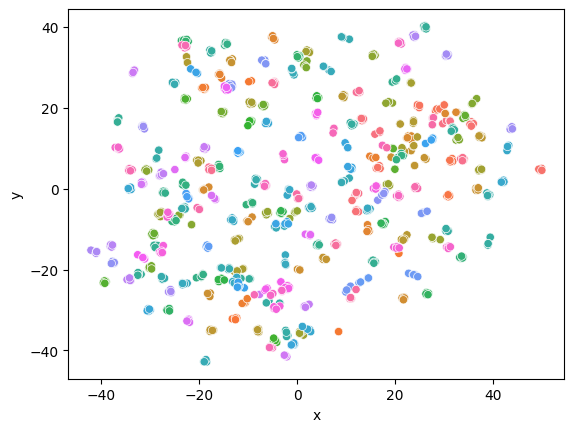

In [5]:
import seaborn as sns

sns.scatterplot(df, x='x', y='y', hue='labels', legend=False)